In [1]:
# Importing the libraries
import numpy as np
import tensorflow as tf
from keras.datasets import fashion_mnist, mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
fashion_mnist = input_data.read_data_sets('data/fashion', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/',
                                one_hot=True, reshape=False)

W0618 06:39:45.631480 139908906350464 deprecation.py:323] From <ipython-input-2-5c7f9ee034f2>:3: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0618 06:39:45.632797 139908906350464 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0618 06:39:45.637814 139908906350464 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 26421880 bytes.
Extracting data/fashion/train-images-idx3-ubyte.gz


W0618 06:39:48.020562 139908906350464 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0618 06:39:48.023099 139908906350464 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 29515 bytes.
Extracting data/fashion/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 4422102 bytes.
Extracting data/fashion/t10k-images-idx3-ubyte.gz


W0618 06:39:49.374955 139908906350464 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 5148 bytes.
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [0]:
train_images = fashion_mnist.train.images
train_labels = fashion_mnist.train.labels

In [0]:
label_to_class = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3:  'Dress',
    4: 'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:  'Bag',
    9:  'Ankle boot'
}

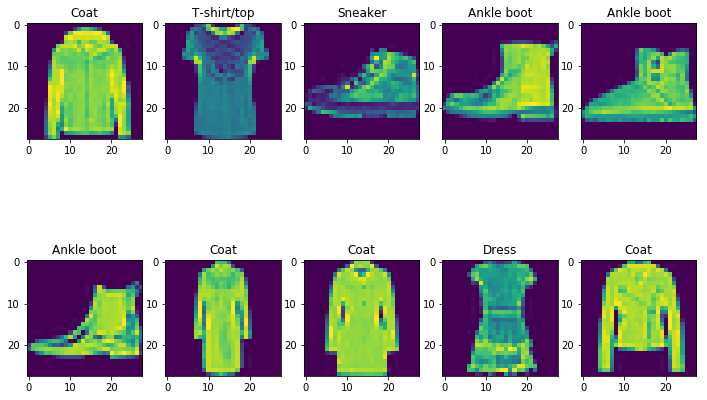

In [5]:
fig, ax = plt.subplots(2, 5, figsize=(12, 8))
for i in range(2):
    for j in range(5):
        ax[i][j].imshow(train_images[i * 5 + j].reshape(28, 28))
        ax[i][j].set_title(label_to_class[train_labels[i * 5 + j].argmax()])
plt.show()

In [0]:
# Defining the architecture of the CNN
x = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28, 1], name='Images')
y = tf.placeholder(dtype=tf.float32, shape=[None, 10], name='Labels')

In [0]:
# Defining the weights and biases
weights = {
    'wc1': tf.Variable(tf.truncated_normal([3, 3, 1, 32])),
    'wc2': tf.Variable(tf.truncated_normal([3, 3, 32, 64])),
    'wc3': tf.Variable(tf.truncated_normal([3, 3, 64, 64])),
    'wc4': tf.Variable(tf.truncated_normal([3, 3, 64, 128])),
    'wd1': tf.Variable(tf.truncated_normal([7 * 7 * 128, 1024])),
    'wd2': tf.Variable(tf.truncated_normal([1024, 256])),
    'out': tf.Variable(tf.truncated_normal([256, 10]))}

biases = {
    'bc1': tf.Variable(tf.truncated_normal([32])),
    'bc2': tf.Variable(tf.truncated_normal([64])),
    'bc3': tf.Variable(tf.truncated_normal([64])),
    'bc4': tf.Variable(tf.truncated_normal([128])),
    'bd1': tf.Variable(tf.truncated_normal([1024])),
    'bd2': tf.Variable(tf.truncated_normal([256])),
    'out': tf.Variable(tf.truncated_normal([10]))}

In [0]:
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

In [0]:
# Defining the model
def conv_net(x, weights, biases):
    # Conv + MaxPool
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2)

    # Layer 2 Conv + MaxPool
    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    conv4 = conv2d(conv3, weights['wc4'], biases['bc4'])
    conv4 = maxpool2d(conv4, k=2)
    
    # Fully connected layer
    fc1 = tf.reshape(conv4, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc2 = tf.nn.relu(tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2']))
    # Output Layer
    out = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    return out

In [0]:
# Parameters
learning_rate = 1e-3
epochs = 5
batch_size = 128
n_classes = 10
test_valid_size = 256

In [11]:
# Model
logits = conv_net(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()
saver = tf.train.Saver()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(epochs):
        for batch in range(len(train_images)//batch_size):
            batch_x, batch_y = fashion_mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})

            # Calculate batch loss and accuracy
            loss, train_acc = sess.run([cost, accuracy], feed_dict={x: batch_x, y: batch_y})
            valid_acc = sess.run(accuracy, feed_dict={
                x: fashion_mnist.validation.images[:test_valid_size],
                y: fashion_mnist.validation.labels[:test_valid_size]})

            print('Epoch {:>2}, Batch {:>3} - train_acc: {:>10.4f} Valid_acc: {:.6f}'.format(
                epoch + 1,
                batch + 1,
                train_acc,
                valid_acc))

    # Calculate Test Accuracy
    test_acc = sess.run(accuracy, feed_dict={
        x: fashion_mnist.test.images[:test_valid_size],
        y: fashion_mnist.test.labels[:test_valid_size]})
    print('Testing Accuracy: {}'.format(test_acc))
    saver.save(sess, 'model_basic.cpkt')

W0618 06:41:22.774268 139908906350464 deprecation.py:323] From <ipython-input-11-53d07959b5fe>:4: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Epoch  1, Batch   1 - train_acc:     0.1641 Valid_acc: 0.152344
Epoch  1, Batch   2 - train_acc:     0.1875 Valid_acc: 0.117188
Epoch  1, Batch   3 - train_acc:     0.1250 Valid_acc: 0.191406
Epoch  1, Batch   4 - train_acc:     0.3281 Valid_acc: 0.226562
Epoch  1, Batch   5 - train_acc:     0.2578 Valid_acc: 0.273438
Epoch  1, Batch   6 - train_acc:     0.2734 Valid_acc: 0.285156
Epoch  1, Batch   7 - train_acc:     0.2734 Valid_acc: 0.296875
Epoch  1, Batch   8 - train_acc:     0.3594 Valid_acc: 0.335938
Epoch  1, Batch   9 - train_acc:     0.3359 Valid_acc: 0.343750
Epoch  1, Batch  10 - train_acc:     0.3984 Valid_acc: 0.335938
Epoch  1, Batch  11 - train_acc:     0.4219 Valid_acc: 0.367188
Epoch  1, Batch  12 - train_acc:     0.4844 Valid_acc: 0.429688
Epoch  1, Batch  13 - train_acc:     0.5781 Valid_acc: 0.468750
Epoch  1, Batch  14 - train_acc:     0.4766 Valid_acc: 0.480469
Epoch  1, Batch  15 - train_acc:     0.4766 Valid_acc: 0.453125
Epoch  1, Batch  16 - train_acc:     0.3

In [12]:
accuracy

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>

In [13]:
x

<tf.Tensor 'Images:0' shape=(?, 28, 28, 1) dtype=float32>

In [15]:
# Loading the model from checkpoint
with tf.Session() as sess:
  # Restore variables from disk.
    saver = tf.train.import_meta_graph('model_basic.cpkt.meta')
    saver.restore(sess, "model_basic.cpkt")
    print("Model restored.")
    #saver.recover_last_checkpoints('model.cpkt')
#     test_acc = sess.run(accuracy, feed_dict={
#         x: fashion_mnist.test.images[:test_valid_size],
#         y: fashion_mnist.test.labels[:test_valid_size]})
    graph = tf.get_default_graph()
    accuracy = graph.get_tensor_by_name("Mean_1:0")
    x = graph.get_tensor_by_name('Images:0')
    y = graph.get_tensor_by_name('Labels:0')
    print('Testing Accuracy: {}'.format(sess.run(accuracy, feed_dict={x: fashion_mnist.test.images[:test_valid_size],
                                                                y: fashion_mnist.test.labels[:test_valid_size]})))

Model restored.
Testing Accuracy: 0.82421875
